In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [2]:
#The following CSV file was compiled from the Logistic Regression based DEG analysis: early vs late controls (normal pregnancy samples) 
data= pd.read_csv('./PE_global_heatmaps/early_genes_differential.csv', index_col= 'gene')

data.head()

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cell_type
gene,,,,,,
PAEP,1.410000e-191,3.162086,0.976,0.069,3.690000e-187,dVEC
IGKC,5.810000e-49,-1.908166,0.002,0.219,1.520000e-44,dVEC
ADAMTS9,5.940000e-49,1.698327,0.759,0.158,1.550000e-44,dVEC
SLC2A3,1.520000e-41,1.200272,0.698,0.173,3.970000e-37,dVEC
PCDH17,8.850000e-41,1.466038,0.729,0.182,2.310000e-36,dVEC


In [9]:
data_deg= data[data['p_val_adj'] < 0.05]

data_deg.head()

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cell_type
gene,,,,,,
PAEP,1.410000e-191,3.162086,0.976,0.069,3.690000e-187,dVEC
IGKC,5.810000e-49,-1.908166,0.002,0.219,1.520000e-44,dVEC
ADAMTS9,5.940000e-49,1.698327,0.759,0.158,1.550000e-44,dVEC
SLC2A3,1.520000e-41,1.200272,0.698,0.173,3.970000e-37,dVEC
PCDH17,8.850000e-41,1.466038,0.729,0.182,2.310000e-36,dVEC


In [10]:
data_deg.shape

(1012, 6)

In [11]:
data_deg.groupby('cell_type').size() #before ordering

cell_type
DSC_1    388
DSC_2      7
dFB      169
dLEC      10
dMSC     241
dSMC      32
dVEC     165
dtype: int64

In [12]:
order= ['dVEC', 'dSMC', 'dLEC', 'dFB', 'DSC_1', 'DSC_2', 'dMSC']

#Reorder the cell types. 
data_deg["cell_type"] = pd.Categorical(data_deg["cell_type"], categories = order)

data_deg= data_deg.sort_values(by = "cell_type")

/home/debnatho/anaconda3/envs/trajectory_analysis_R/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
data_deg.groupby('cell_type').size()

cell_type
dVEC     165
dSMC      32
dLEC      10
dFB      169
DSC_1    388
DSC_2      7
dMSC     241
dtype: int64

In [14]:
#Make the color codes consistent with the UMAP colors as shown in main 1B. 
cols_list= ['#f87060', '#0b1d51', '#bfff80', '#bf3100', '#56cbf9', '#7c0b2b', '#c0c999']

In [15]:
def make_de_strip_plot(all_de):
    fig = plt.figure(figsize=[6, 4])
    order= ['dVEC', 'dSMC', 'dLEC', 'dFB', 'DSC_1', 'DSC_2', 'dMSC']
    #order = all_de.cell_type.value_counts().index

    ax1 = sns.stripplot(data=all_de, 
              y='avg_logFC', 
              x='cell_type', 
              order= None,
              jitter=True, 
              size=7,
              alpha=.8,
              palette= cols_list
              )
    plt.xticks(rotation=45, horizontalalignment="right");#rotation_mode="anchor");
    
    ax2 = ax1.twinx()  
    
    #num_de_genes = all_de.groupby('cell_type').size().sort_values(ascending=False)
    num_de_genes= all_de.groupby('cell_type').size()
    ax2.hlines(num_de_genes, np.arange(len(order))-.4, np.arange(len(order))+.4, colors='k', linewidth=2)
    ax2.set_ylabel('Number of signficant early diferentially expressed genes', color='k')  
    
    for i,num in enumerate(num_de_genes):
        ax2.text(s=str(num), x=i, y=num+4, ha='center', fontsize='large', fontweight='bold')

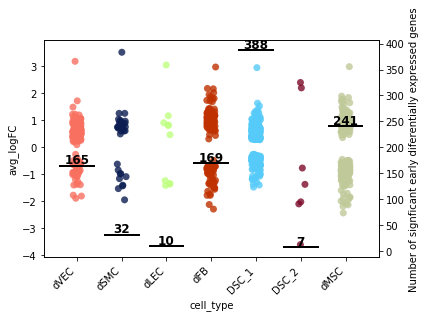

In [16]:
cg= make_de_strip_plot(data_deg)

plt.savefig("./Early_DEG_plots/Early_remodeling_plot_final_v2.pdf", dpi=800)

#In the final figure, up/downregulated genes are written as separate color codes & the hlines are removed. 